# Project : SPAM EMAIL DETECTION

# Description: Create a model to classify emails as spam or not spam based on their content.

# Importing Necessary Libraries

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Dataset

In [61]:
df = pd.read_csv("D:/spam.csv")

In [62]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Getting Not Null Data

In [63]:
df= df.where(pd.notnull(df),'')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Count Plot of Category

<Axes: xlabel='Category', ylabel='count'>

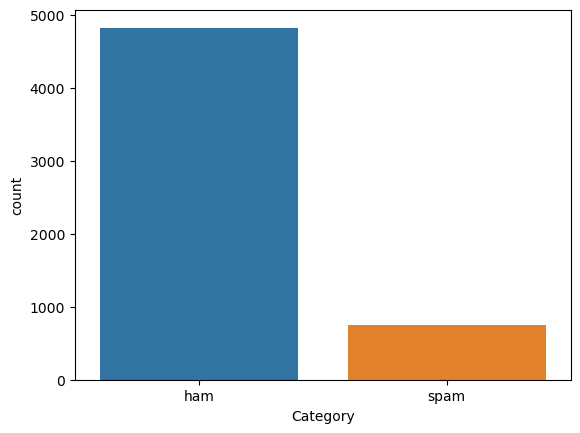

In [64]:
sns.countplot(data=df, x='Category')

# Replacing Values

In [65]:
df.loc[df['Category']=='spam','Category',]=0
df.loc[df['Category']=='ham','Category',]=1

In [66]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


# Feature Extract

In [67]:
X = df['Message']
y= df['Category']

In [68]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

# Data Split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=9)

# Convert Textual Data into Numerical Vector

In [70]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase= True)

In [71]:
X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.transform(X_test)

In [72]:
print(X_train_feature)

  (0, 5994)	0.48487537059673974
  (0, 6016)	0.48487537059673974
  (0, 7183)	0.38811046427357665
  (0, 4246)	0.46853319461766263
  (0, 4751)	0.3995480735031329
  (1, 3704)	0.40679606794582573
  (1, 5281)	0.6117395117581471
  (1, 3985)	0.29337092325522474
  (1, 1425)	0.6117395117581471
  (2, 4321)	0.7071067811865476
  (2, 2839)	0.7071067811865476
  (3, 6981)	0.2152157879013364
  (3, 3510)	0.2456544200128925
  (3, 3551)	0.2680188259240245
  (3, 8)	0.2922841293900595
  (3, 6999)	0.27830306706658076
  (3, 6726)	0.1771628750916276
  (3, 4128)	0.262409511764221
  (3, 2113)	0.16610957105957078
  (3, 4051)	0.2680188259240245
  (3, 3422)	0.24739685489219274
  (3, 7404)	0.1948799373403916
  (3, 6978)	0.2922841293900595
  (3, 1845)	0.20742116622566584
  (3, 2691)	0.2745670671412955
  :	:
  (4454, 2443)	0.17161518133998263
  (4454, 1792)	0.18697826514183577
  (4454, 2748)	0.21257074773064358
  (4454, 4080)	0.7728431280804475
  (4454, 2749)	0.223895601686552
  (4454, 2250)	0.223895601686552
  (4455,

# Model Selection

In [73]:
rc = RandomForestClassifier()
abc = AdaBoostClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
kc = KNeighborsClassifier(n_neighbors=1)

In [74]:
models= [rc, abc,dt,lr,kc]

# Change Datatype of Target Data

In [75]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Model Evaluation

In [76]:
for model in models:
    print(f'The Model is :{model}')
    model.fit(X_train_feature, y_train)
    print(f'The Accuracy score of {model} --> {accuracy_score(y_test, model.predict(X_test_feature))}')

The Model is :RandomForestClassifier()
The Accuracy score of RandomForestClassifier() --> 0.979372197309417
The Model is :AdaBoostClassifier()


C:\Users\Ehtisham\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The Accuracy score of AdaBoostClassifier() --> 0.9668161434977578
The Model is :DecisionTreeClassifier()
The Accuracy score of DecisionTreeClassifier() --> 0.9650224215246637
The Model is :LogisticRegression()
The Accuracy score of LogisticRegression() --> 0.9650224215246637
The Model is :KNeighborsClassifier(n_neighbors=1)
The Accuracy score of KNeighborsClassifier(n_neighbors=1) --> 0.9506726457399103


# New Input Data to Predict

In [77]:
spam_mail=['Dear Winner, You have been selected for a grand prize of $1,000,000! To claim your prize, please provide your personal details, including your bank account number, so we can transfer the money to you. Don\'t miss this once-in-a-lifetime opportunity']
ham_mail=['This is a friendly reminder for our upcoming meeting to discuss the project updates and next steps. Here are the details of the meeting.']

# Spam Mail

In [78]:
input_data_feature = feature_extraction.transform(spam_mail)

In [79]:
for model in models:
    print(f'Model is {model} ---> Prediction {model.predict(input_data_feature)}')

Model is RandomForestClassifier() ---> Prediction [0]
Model is AdaBoostClassifier() ---> Prediction [0]
Model is DecisionTreeClassifier() ---> Prediction [0]
Model is LogisticRegression() ---> Prediction [1]
Model is KNeighborsClassifier(n_neighbors=1) ---> Prediction [1]


# Ham Mail

In [80]:
input_data_feature = feature_extraction.transform(ham_mail)

In [81]:
for model in models:
    print(f'Model is {model} ---> Prediction {model.predict(input_data_feature)}')

Model is RandomForestClassifier() ---> Prediction [1]
Model is AdaBoostClassifier() ---> Prediction [1]
Model is DecisionTreeClassifier() ---> Prediction [1]
Model is LogisticRegression() ---> Prediction [1]
Model is KNeighborsClassifier(n_neighbors=1) ---> Prediction [1]


# Selecting Best Model Prediction

In [82]:
#Model is RandomForestClassifier()
#Model is AdaBoostClassifier() 
#Model is DecisionTreeClassifier() 